In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor

In [2]:
DATA_DIR = os.path.join('data')

print (DATA_DIR)

data


In [3]:
all_data = pd.read_csv(os.path.join(DATA_DIR,'merged_data.csv'), index_col='id')
all_data.shape

(9590, 323)

In [4]:
all_data = all_data.drop('orgs', axis=1)
all_data = all_data.drop('ownerName', axis=1)
all_data = all_data.drop('userType', axis=1)
all_data = all_data.drop('ownerType', axis=1)
all_data = all_data[all_data['Java'].notnull()]
all_data = all_data[all_data['publicRepos'].notnull()]
all_data.shape



(8394, 319)

In [5]:
#train_outcome = all_data[['stars']]
#train_features = all_data.drop('stars', axis=1)
features = all_data.drop('stars', axis=1)
outcome = np.ravel(all_data[['stars']])

In [13]:
scaler = MinMaxScaler()
model = SGDRegressor()
pipe = make_pipeline(scaler, model)
param_grid = { 'sgdregressor__loss':['epsilon_insensitive'],
              'sgdregressor__max_iter':[5000],
              'sgdregressor__penalty':['none'],
              'sgdregressor__epsilon':[0.6],
              'sgdregressor__eta0': [0.1]
             }
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=6, cv=5)
grid.fit(features, outcome)
print(grid.best_params_)
print(grid.best_score_)
grid_preds = grid.predict(features)

{'sgdregressor__epsilon': 0.6, 'sgdregressor__eta0': 0.1, 'sgdregressor__loss': 'epsilon_insensitive', 'sgdregressor__max_iter': 5000, 'sgdregressor__penalty': 'none'}
-152299535.848


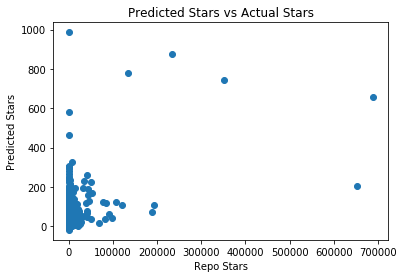

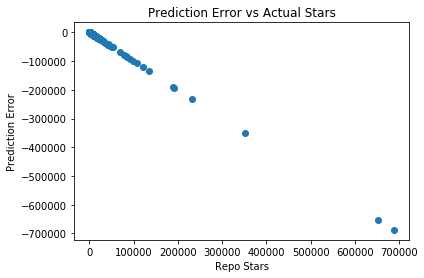

In [14]:
plt.scatter(outcome, grid_preds)
plt.title('Predicted Stars vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Predicted Stars")
plt.show()

plt.scatter(outcome, grid_preds - outcome)
plt.title('Prediction Error vs Actual Stars')
plt.xlabel("Repo Stars")
plt.ylabel("Prediction Error")
plt.show()